In [1]:
"""
This Jupyter notebook consist of code primarily produced by Valerio Velardo for this YouTube video: https://youtu.be/KxRmbtJWUzI
"""

import cmath
import matplotlib.pyplot as plt
import numpy as np
import librosa

In [13]:
def create_signal(frequency, time, comp=True, phase=0):
    if comp:
        sin = np.sin(2 * np.pi * (frequency * time))
        sin2 = np.sin(2 * np.pi * (2 * frequency * time))
        sin3 = np.sin(2 * np.pi * (3 * frequency * time))
        sinusoid = sin + sin2 + sin3
    else:
        sinusoid = np.cos(2*np.pi*(frequency*time)+phase)

    return sinusoid

In [14]:
def calculate_centre_of_gravity(mult_signal):
    x_centre = np.mean([x.real for x in mult_signal])
    y_centre = np.mean([x.imag for x in mult_signal])
    return x_centre, y_centre

In [15]:
def calculate_sum(mult_signal):
    x_sum = np.sum([x.real for x in mult_signal])
    y_sum = np.sum([x.imag for x in mult_signal])
    return x_sum, y_sum

In [16]:
def create_pure_tone(frequency, time):
    angle = -2 * np.pi * frequency * time
    return np.cos(angle) + 1j * np.sin(angle)

In [17]:
def plot_fourier_transform(pure_tone_frequency, 
                           signal_frequency,
                           signal_phase,
                           comp,
                           time,
                           time_points,
                           plot_centre_of_gravity=False,
                           plot_sum=False,
                           figsize=(15,10)):
    
    # create sinusoid and signal
    pure_tone = create_pure_tone(pure_tone_frequency, time)
    signal = create_signal(signal_frequency, time, comp=comp, phase=signal_phase)
    
    # multiply pure tone and signal
    mult_signal = pure_tone * signal
    
    X = [x.real for x in mult_signal]
    Y = [x.imag for x in mult_signal]

    plt.figure(figsize=figsize)
    plt.plot(X, Y)

    # calculate and plot centre of gravity
    if plot_centre_of_gravity:
        centre_of_gravity = calculate_centre_of_gravity(mult_signal)
        plt.plot([centre_of_gravity[0]], 
                 [centre_of_gravity[1]], 
                 marker='-', markersize=10, color="red")
    print(len(X))
    print(len(Y))
    
    for timepoint in time_points:
        time_index = int((len(time)-1)/time[-1] * timepoint)
        plt.plot([X[time_index]], [[Y[time_index]]], 
                 marker="o", markersize=7, color="blue")



    # calculate and plot sum 
    if plot_sum:
        integral = calculate_sum(mult_signal)
        plt.plot([integral[0]/1000], [integral[1]/1000], 
                 marker='o', markersize=10, color="green")

    
    # set origin axes
    ax = plt.gca()
    ax.grid(True)
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_color('none')
   # ax.yaxis.set_ticks(np.linspace(-1, 1, 5))
   # ax.xaxis.set_ticks(np.linspace(-1, 1, 5))
    
    
    plt.xlim(-1, 6)
    plt.ylim(-0.6, 0.6)
    
    
    
    plt.show()

In [18]:
def plot_signal(time, signal, time_points=[1.125]):
    plt.figure(figsize=(10, 2))
    plt.plot(time, signal)

    for timepoint in time_points:
        time_index = int((len(time)-1)/time[-1] * timepoint)
        plt.plot([timepoint], [[signal[time_index]]],
                 marker="o", markersize=7, color="blue")
        
    plt.xlabel("Time")
    plt.ylabel("Intensity")
    plt.show()

(10000,)


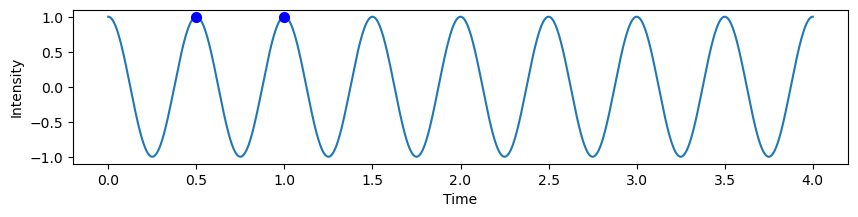

In [19]:
time = np.linspace(0, 4, 10000)
signal = create_signal(frequency=2, time=time, comp=False, phase=0)
print(signal.shape)
plot_signal(time, signal, time_points=[0.5, 1])


10000
10000


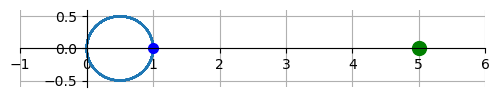

In [22]:
time = np.linspace(0, 4
                   , 10000)
plot_fourier_transform(pure_tone_frequency=2,
                       comp=False,
                       signal_frequency=2,
                       signal_phase=0,
                       time=time,
                       time_points=[3],
                       plot_centre_of_gravity=False,
                       plot_sum=True,
                       figsize=(6,1))